<a href="https://colab.research.google.com/github/lonebots/Car-Price-Prediction/blob/main/car_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROBLEM STATEMENT**
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 


### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## **LOADING DATA**

In [ ]:
#libraries required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ML/TinkerWeek.py/project/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.shape

(205, 26)

In [ ]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## **CLEANING DATA**

In [ ]:
#separting the model name from the car company name and adding it as a new coloum CompanyName
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#printing unique car company names
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
#Checking for duplicates
data.loc[data.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


CORRECTING SPELLING MISTAKES
- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [ ]:
data.CompanyName = data.CompanyName.str.lower()

def replace_name(a,b):
    data.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## **GETTING VALUABLE INSIGHTS AND INFERENCES FROM THE DATA**

The entire colum can be divided into two categories namely 
  - Categorical Data
    - CompanyName
    - Symboling
    - fueltype
    - enginetype
    - carbody
    - doornumber
    - enginelocation
    - fuelsystem
    - cylindernumber
    - aspiration
    - drivewheel

  - Numerical Data
    - carlength
    - carwidth
    - carheight
    - curbweight

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


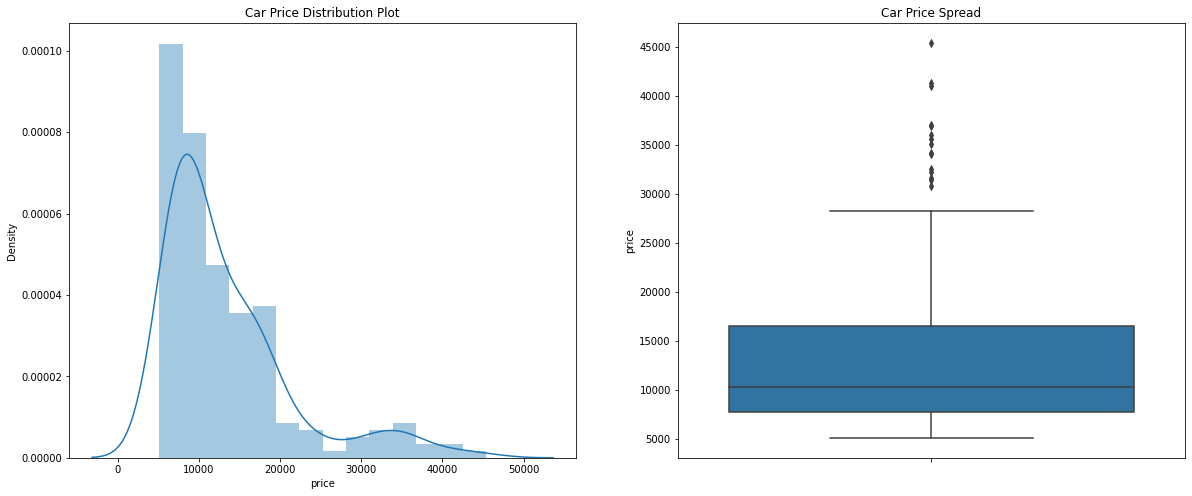

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.price)

plt.show()

### **CATEGORICAL DATA VISUALIZATION**

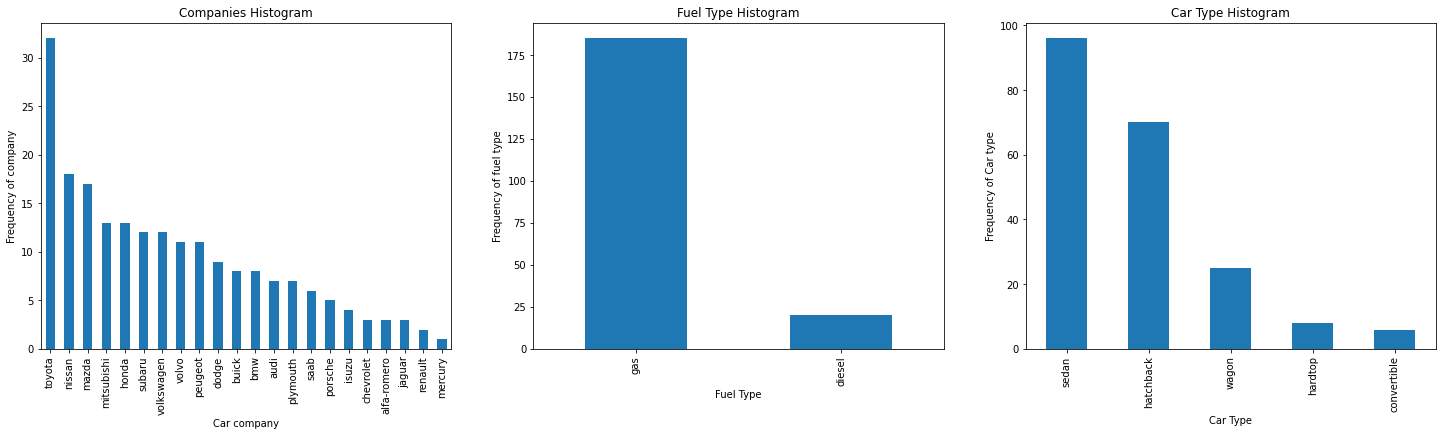

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = data.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = data.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

Inference :

1. `Toyota` seemed to be favored car company.
2. Number of `gas` fueled cars are more than `diesel`.
3. `sedan` is the top car type prefered.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


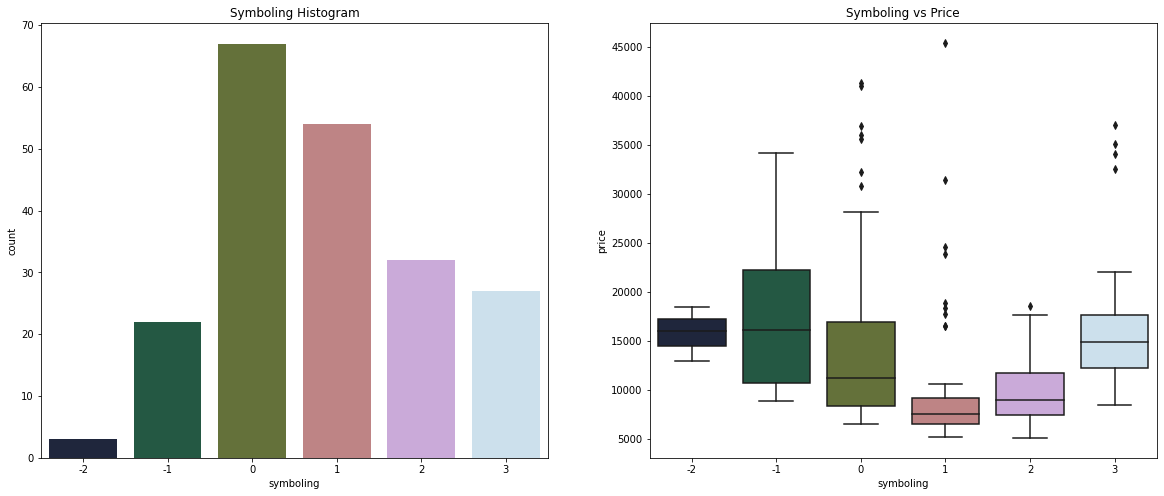

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(data.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=data.symboling, y=data.price, palette=("cubehelix"))

plt.show()

Inference :

1. It seems that the symboling with `0` and `1` values have high number of rows (i.e. They are most sold.)
2. The cars with `-1` symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with `3` value has the price range similar to `-2` value. There is a dip in price at symboling `1`.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


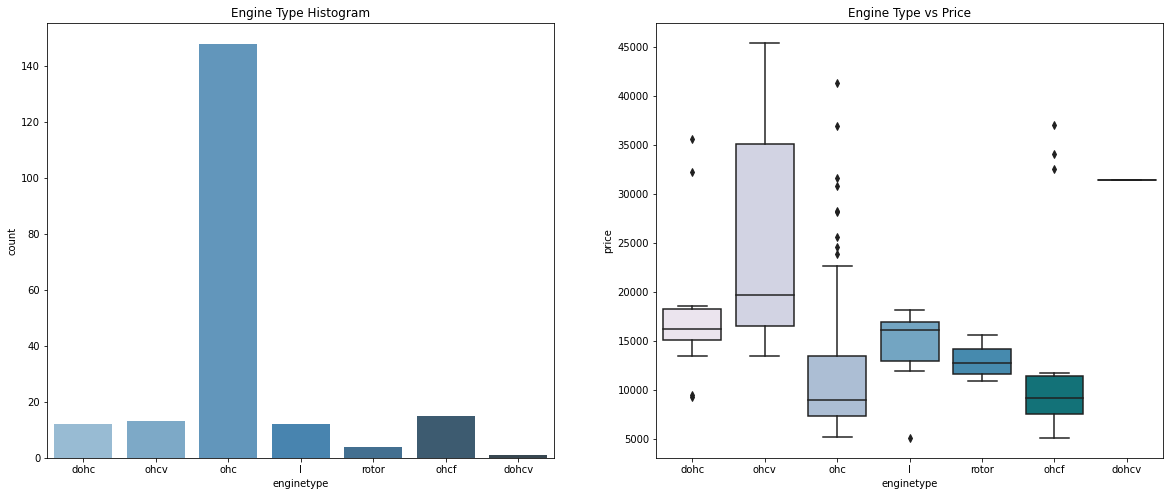

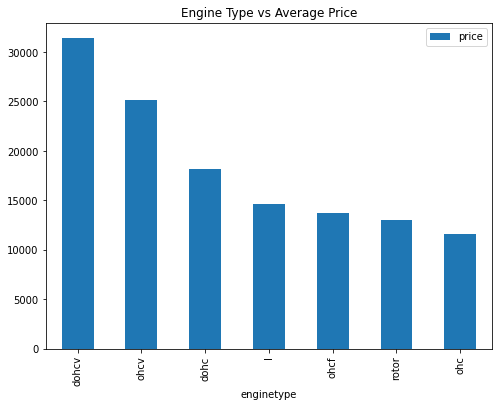

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(data.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=data.enginetype, y=data.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()


Inference :

1. `ohc` Engine type seems to be most favored type.
2. `ohcv` has the highest price range (While `dohcv` has only one row), `ohc` and `ohcf` have the low price range.

<Figure size 1800x432 with 0 Axes>

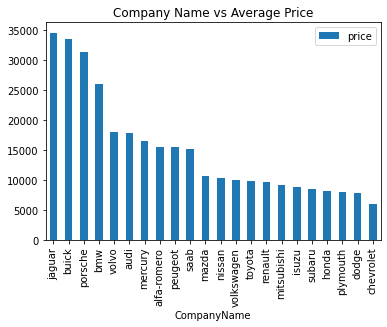

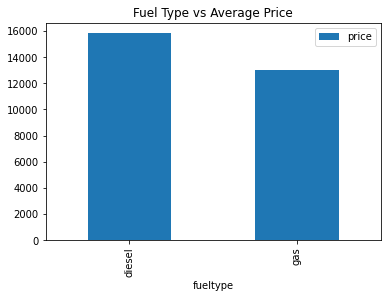

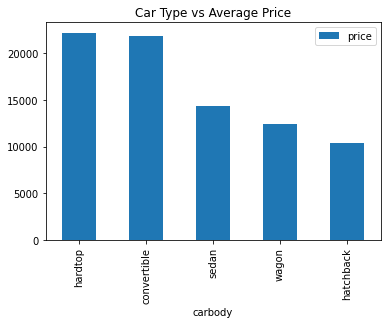

In [ ]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(data.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Inference :

1. `Jaguar` and `Buick` seem to have highest average price.
2. `diesel` has higher average price than  gas.
3. `hardtop` and `convertible` have higher average price.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


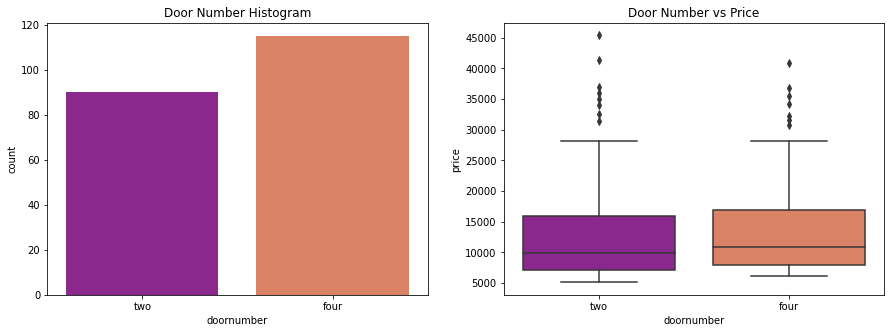

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


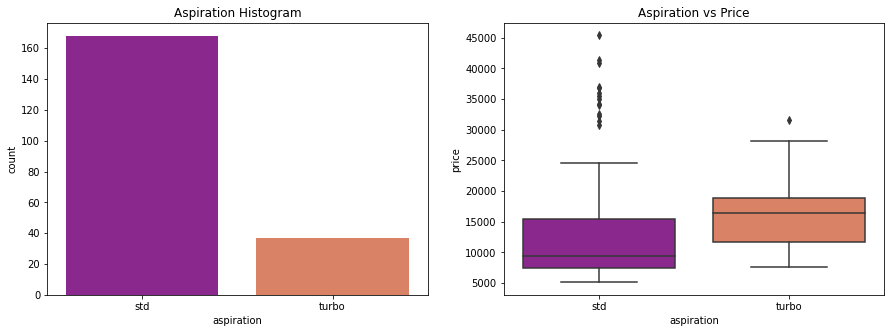

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(data.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=data.doornumber, y=data.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(data.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=data.aspiration, y=data.price, palette=("plasma"))

plt.show()


Inference :

1. `doornumber` variable is not affacting the price much. There is no sugnificant difference between the categories in it.
2. It seems aspiration with `turbo` have higher price range than the `std`(though it has some high values outside the whiskers.)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

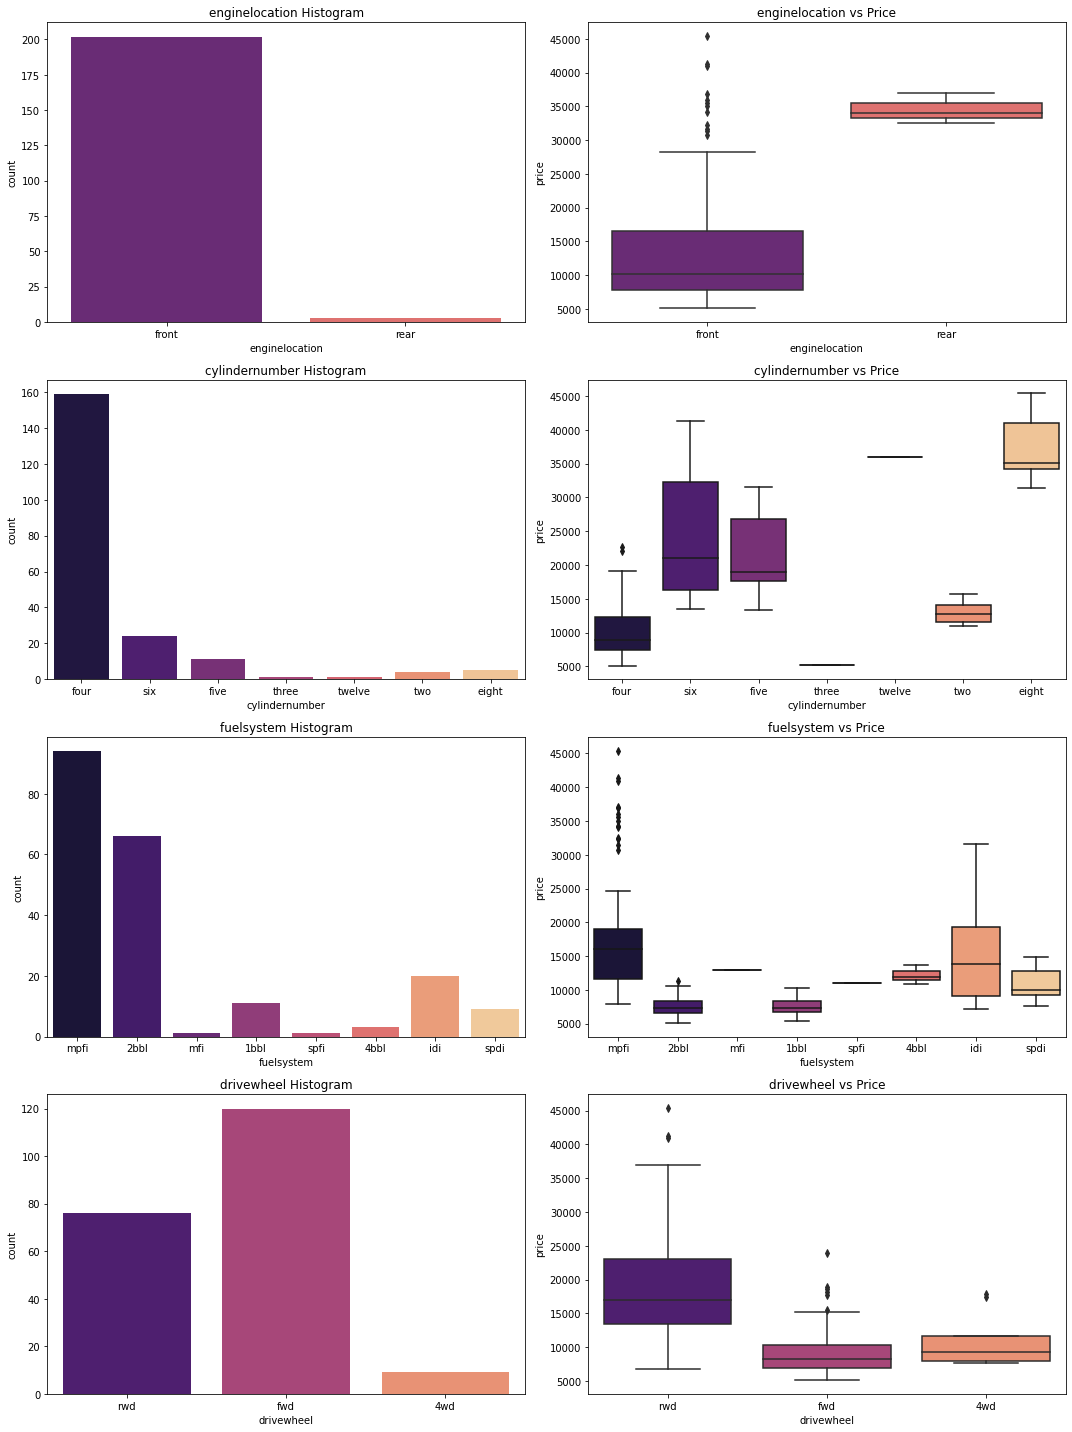

In [ ]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(data[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=data[x], y=data.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

Inference :

1. Very few datapoints for `enginelocation` categories to make an inference.
2. Most common number of cylinders are `four`, `six` and `five`. Though `eight` cylinders have the highest price range.
3. `mpfi` and `2bbl` are most common type of fuel systems. `mpfi` and `idi` having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer `rwd` drivewheel.

### **NUMERICAL DATA VISUALIZATION**

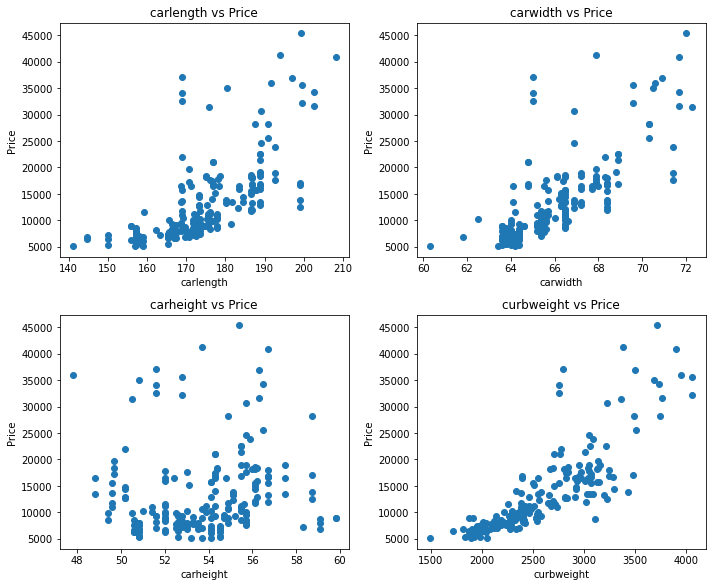

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

Inference :

1. `carwidth`, `carlength` and `curbweight` seems to have a poitive correlation with `price`. 
2. `carheight` doesn't show any significant trend with price.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


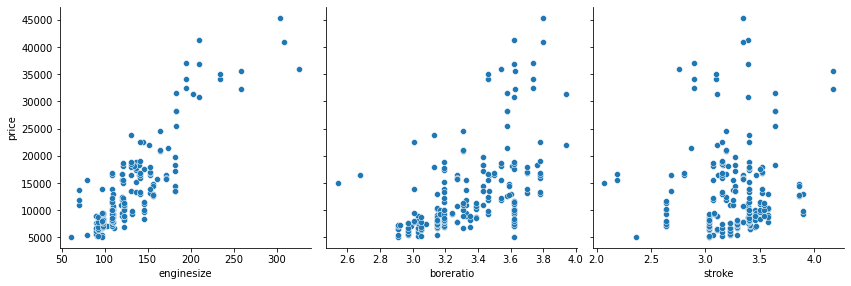

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


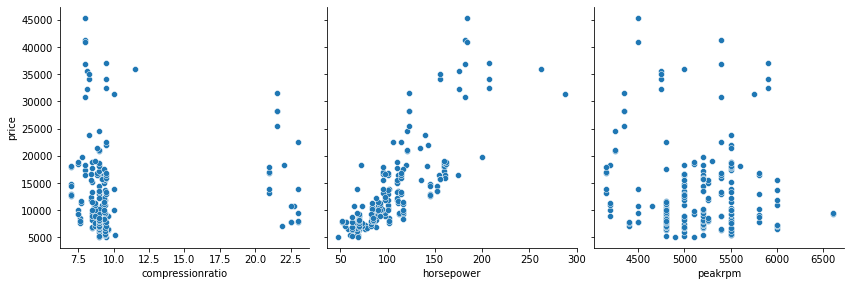

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


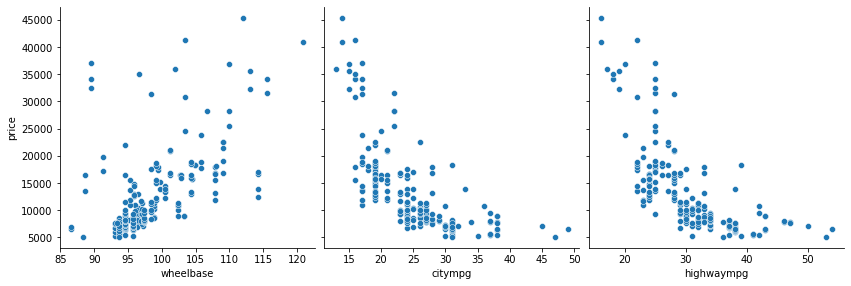

In [ ]:
def pp(x,y,z):
    sns.pairplot(data, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

Inference :

1. `enginesize`, `boreratio`, `horsepower`, `wheelbase` - seem to have a significant positive correlation with price.
2. `citympg`, `highwaympg` - seem to have a significant negative correlation with price.

In [ ]:
np.corrcoef(data['carlength'], data['carwidth'])[0, 1]

0.841118268481846

### **VARIABLES TO BE CONSIDERED**:
  - Engine Type 
  - Fuel type 
  - Car Body 
  - Aspiration 
  - Cylinder Number 
  - Drivewheel 
  - Curbweight 
  - Car Length
  - Car width
  - Engine Size 
  - Boreratio 
  - Horse Power 
  - Wheel base 


In [ ]:
dataset = data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'carlength','carwidth']]
dataset.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


In [ ]:
dataset.shape

(205, 14)

## **SPLITTING, INCLUDING DUMMY AND SCALING DATA**

### **INCLUDING DUMMY VALUES**

Here we get rid of all the categorical values and make separate columns for them and set the data accordingly. This changes the shape of our dataframe object

In [ ]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the dataset

dataset = dummies('fueltype',dataset)
dataset = dummies('aspiration',dataset)
dataset = dummies('carbody',dataset)
dataset = dummies('drivewheel',dataset)
dataset = dummies('enginetype',dataset)
dataset = dummies('cylindernumber',dataset)


In [ ]:
dataset.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


### **SCALLING**

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
train_data, test_data = train_test_split(dataset, test_size = 0.3, random_state = 100)

In [ ]:
train_data.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,7609.0,93.7,2191,98,2.97,68,167.3,63.8,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,22018.0,94.5,2778,151,3.94,143,168.9,68.3,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,9538.0,94.5,2300,98,3.24,112,168.7,64.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,18950.0,104.3,3157,130,3.62,162,188.8,67.2,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       143 non-null    float64
 1   wheelbase   143 non-null    float64
 2   curbweight  143 non-null    int64  
 3   enginesize  143 non-null    int64  
 4   boreratio   143 non-null    float64
 5   horsepower  143 non-null    int64  
 6   carlength   143 non-null    float64
 7   carwidth    143 non-null    float64
 8   gas         143 non-null    uint8  
 9   turbo       143 non-null    uint8  
 10  hardtop     143 non-null    uint8  
 11  hatchback   143 non-null    uint8  
 12  sedan       143 non-null    uint8  
 13  wagon       143 non-null    uint8  
 14  fwd         143 non-null    uint8  
 15  rwd         143 non-null    uint8  
 16  dohcv       143 non-null    uint8  
 17  l           143 non-null    uint8  
 18  ohc         143 non-null    uint8  
 19  ohcf        143 non-null    u

In [ ]:
test_data.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
160,7738.0,95.7,2094,98,3.19,70,166.3,64.4,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
186,8495.0,97.3,2275,109,3.19,85,171.7,65.5,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
59,8845.0,98.8,2385,122,3.39,84,177.8,66.5,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
165,9298.0,94.5,2265,98,3.24,112,168.7,64.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
140,7603.0,93.3,2240,108,3.62,73,157.3,63.8,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_vars = ['price','wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth']
train_data[num_vars] = scaler.fit_transform(train_data[num_vars])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
train_data.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,-0.700201,-0.811836,-0.642128,-0.660242,-1.297329,-0.872898,-0.487238,-0.924500,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,1.151929,-0.677177,0.439415,0.637806,2.432256,1.021826,-0.359789,1.114978,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,-0.452248,-0.677177,-0.441296,-0.660242,-0.259197,0.238673,-0.375720,-0.833856,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.442646,-1.670284,0.015642,0.123485,0.625138,0.213410,-0.367754,-0.788535,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,0.757569,0.972390,1.137720,0.123485,1.201877,1.501822,1.225364,0.616439,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
#Dividing data into X and y variables
y_train = train_data.pop('price')
x_train = train_data

In [ ]:
x_train.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,-0.811836,-0.642128,-0.660242,-1.297329,-0.872898,-0.487238,-0.924500,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,-0.677177,0.439415,0.637806,2.432256,1.021826,-0.359789,1.114978,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,-0.677177,-0.441296,-0.660242,-0.259197,0.238673,-0.375720,-0.833856,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,-1.670284,0.015642,0.123485,0.625138,0.213410,-0.367754,-0.788535,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,0.972390,1.137720,0.123485,1.201877,1.501822,1.225364,0.616439,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


## **MODEL BUILDING**

In [ ]:
#RFE -> Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#model fitting
model = LinearRegression()
model.fit(x_train,y_train)
rfe = RFE(model, 12)
rfe = rfe.fit(x_train, y_train)

In [ ]:
#listing feature according to their rfe ranking
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 13),
 ('curbweight', False, 10),
 ('enginesize', True, 1),
 ('boreratio', False, 14),
 ('horsepower', True, 1),
 ('carlength', False, 11),
 ('carwidth', False, 8),
 ('gas', False, 2),
 ('turbo', False, 12),
 ('hardtop', False, 4),
 ('hatchback', False, 3),
 ('sedan', False, 5),
 ('wagon', False, 6),
 ('fwd', False, 16),
 ('rwd', True, 1),
 ('dohcv', True, 1),
 ('l', False, 9),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', True, 1),
 ('rotor', False, 7),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 15),
 ('twelve', True, 1),
 ('two', True, 1)]

### **STATISTICAL MODEL BUILDING**

In [ ]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,enginesize,horsepower,rwd,dohcv,ohc,ohcf,ohcv,five,four,six,twelve,two
122,-0.660242,-0.872898,0,0,1,0,0,0,1,0,0,0
125,0.637806,1.021826,1,0,1,0,0,0,1,0,0,0
166,-0.660242,0.238673,1,0,0,0,0,0,1,0,0,0
1,0.123485,0.213410,1,0,0,0,0,0,1,0,0,0
199,0.123485,1.501822,1,0,1,0,0,0,1,0,0,0


In [ ]:
def build_model(x,y):
    x = sm.add_constant(x) #Adding the constant
    model = sm.OLS(y,x).fit() # fitting the model
    print(model.summary()) # model summary
    return x
    
def checkVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### MODEL 1

In [ ]:
x_train_model1 = build_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     82.64
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           9.64e-55
Time:                        10:42:19   Log-Likelihood:                -48.821
No. Observations:                 143   AIC:                             123.6
Df Residuals:                     130   BIC:                             162.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5625      0.253      2.226      0.0

In [ ]:
#Calculating the Variance Inflation Factor
checkVIF(x_train_model1)

,Features,VIF
0,const,71.61
9,four,13.71
10,six,7.48
1,enginesize,6.51
2,horsepower,5.37
8,five,5.06
12,two,3.72
5,ohc,2.87
3,rwd,2.57
7,ohcv,2.04


dropping `four` because of high VIF value. (shows that four has high multicollinearity.)

In [ ]:
x_train_new = x_train_rfe.drop(["four"], axis = 1)

#### MODEL 2

In [ ]:
x_train_model2= build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     77.16
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           1.05e-51
Time:                        10:42:19   Log-Likelihood:                -59.040
No. Observations:                 143   AIC:                             142.1
Df Residuals:                     131   BIC:                             177.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4488      0.120     -3.732      0.0

In [ ]:
#Calculating the Variance Inflation Factor
checkVIF(x_train_model2)

,Features,VIF
0,const,14.17
1,enginesize,6.03
2,horsepower,5.27
5,ohc,2.78
3,rwd,2.56
9,six,2.21
6,ohcf,1.86
7,ohcv,1.81
11,two,1.66
10,twelve,1.65


## **TESTING**

In [ ]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
test_data[num_vars] = scaler.transform(test_data[num_vars])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
test_dataset = test_data[['price','four',	'six',	'enginesize','horsepower','five','two',	'ohc',	'rwd','ohcv','dohcv','ohcf','twelve']]
test_dataset.head()

,price,four,six,enginesize,horsepower,five,two,ohc,rwd,ohcv,dohcv,ohcf,twelve
160,3477.154869,1,0,-4.498467,256.428492,0,0,1,0,0,0,0,0
186,3820.240283,1,0,-4.478199,314.102479,0,0,1,0,0,0,0,0
59,3978.866300,1,0,-4.454247,310.257546,0,0,1,0,0,0,0,0
165,4184.173687,1,0,-4.498467,417.915654,0,0,0,1,0,0,0,0
140,3415.970548,1,0,-4.480042,267.963290,0,0,0,0,0,0,1,0


In [ ]:
test_data.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
160,3477.154869,-1.665959,335.884990,-4.498467,-2.982280,256.428492,1.610453,-8.683832,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
186,3820.240283,-1.665753,366.351483,-4.478199,-2.982280,314.102479,1.746873,-8.596210,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
59,3978.866300,-1.665561,384.867031,-4.454247,-2.977382,310.257546,1.900977,-8.516554,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
165,4184.173687,-1.666113,364.668251,-4.498467,-2.981056,417.915654,1.671084,-8.715694,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
140,3415.970548,-1.666267,360.460172,-4.480042,-2.971749,267.963290,1.383086,-8.731625,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
#Dividing into X and y
y_test = test_dataset.pop('price')
x_test = test_dataset

In [ ]:
x_test.head()

,four,six,enginesize,horsepower,five,two,ohc,rwd,ohcv,dohcv,ohcf,twelve
160,1,0,-4.498467,256.428492,0,0,1,0,0,0,0,0
186,1,0,-4.478199,314.102479,0,0,1,0,0,0,0,0
59,1,0,-4.454247,310.257546,0,0,1,0,0,0,0,0
165,1,0,-4.498467,417.915654,0,0,0,1,0,0,0,0
140,1,0,-4.480042,267.963290,0,0,0,0,0,0,1,0


In [ ]:
x_train_model2.columns

Index(['const', 'enginesize', 'horsepower', 'rwd', 'dohcv', 'ohc', 'ohcf',
       'ohcv', 'five', 'six', 'twelve', 'two'],
      dtype='object')

In [ ]:
# Now let's use our model to make predictions.
#x_train_new = x_train_model2.drop('const')
# Creating x_test_new dataframe by dropping variables from x_test
x_test_new = x_test[x_train_model2.columns]
# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

KeyError: ignored

In [ ]:
# Making predictions
y_pred = model.predict(x_test)

ValueError: ignored

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

NameError: ignored

In [ ]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

NameError: ignored

<Figure size 432x288 with 0 Axes>